In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [2]:
import pandas as pd
train=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

train.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='age'>

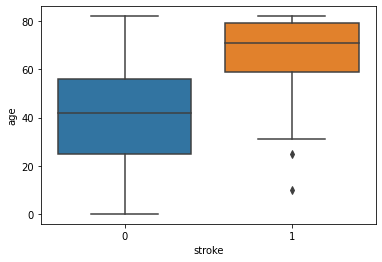

In [4]:
sns.boxplot(data=train,x='stroke',y='age')

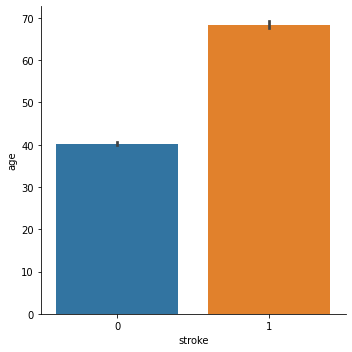

In [5]:
sns.catplot(data=train,x='stroke',y='age',kind='bar')

In [6]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

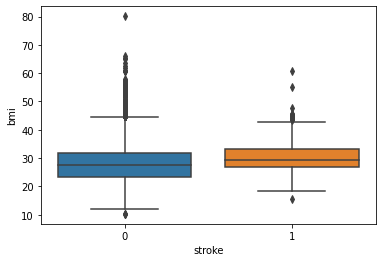

In [7]:
#sns.boxplot(data=train,x='stroke',y='avg_glucose_level')
sns.boxplot(data=train,x='stroke',y='bmi')

#avg_glucose_level
#bmi


In [9]:
train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
train.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [12]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


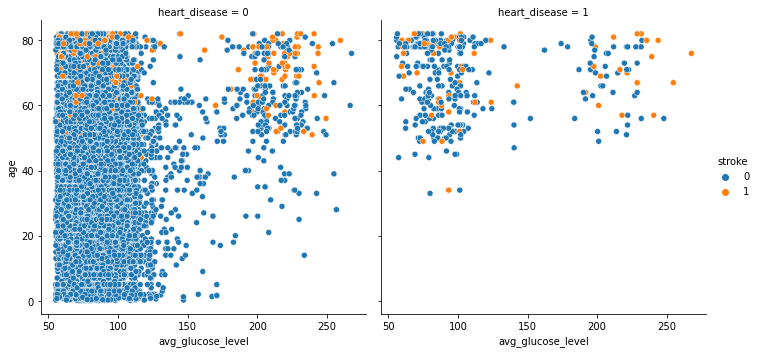

In [13]:
sns.relplot(data=train, x="avg_glucose_level", y="age",hue="stroke",col='heart_disease')


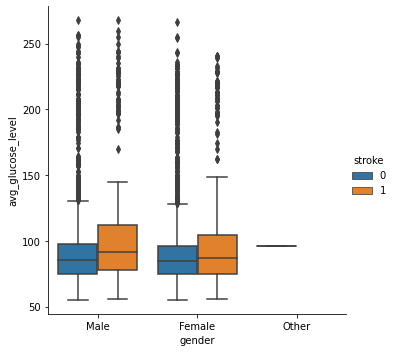

In [14]:
sns.catplot(data=train,x='gender',y='avg_glucose_level',hue='stroke',kind='box')

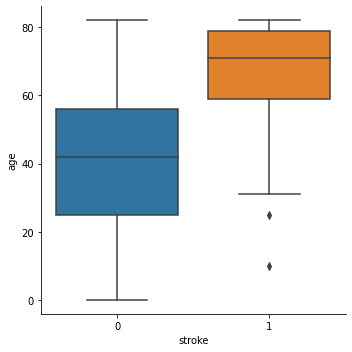

In [15]:
sns.catplot(data=train,x='stroke',y='age',kind='box')
#older people tend have more strokes

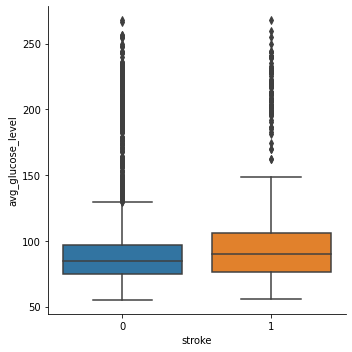

In [16]:
sns.catplot(data=train,x='stroke',y='avg_glucose_level',kind='box')

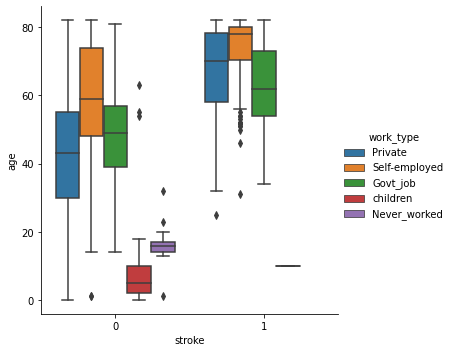

In [17]:
sns.catplot(data=train,x='stroke',y='age',hue='work_type',kind='box')

In [18]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

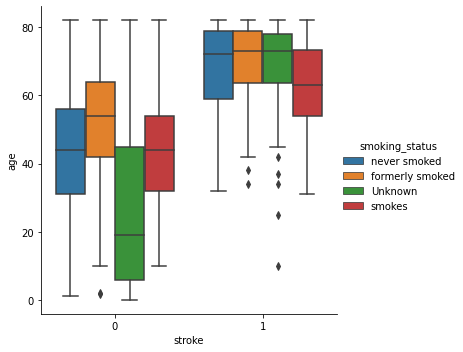

In [19]:
sns.catplot(data=train,x='stroke',y='age',hue='smoking_status',kind='box')

In [20]:
train.groupby(['stroke','gender'])['age']

In [21]:
train.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [22]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

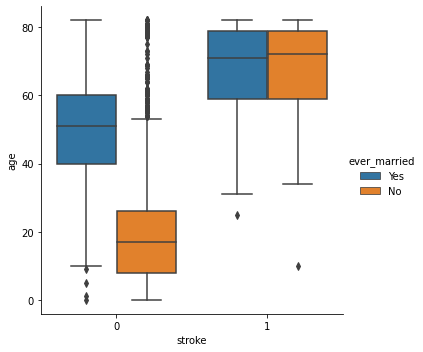

In [23]:
sns.catplot(data=train,x='stroke',y='age',hue='ever_married',kind='box')

In [24]:
train.shape

(15304, 12)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=train.iloc[:,:-1]
Y=train.loc[:,'stroke']

In [26]:
X.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [27]:
from sklearn import preprocessing
X.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [28]:
X.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [29]:
X['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [30]:
#making a dataframe with stroke==1 for finding out about these people
stroke=train.loc[train['stroke']==1]

In [31]:
stroke['work_type'].value_counts()

Private          404
Self-employed    158
Govt_job          69
children           1
Name: work_type, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

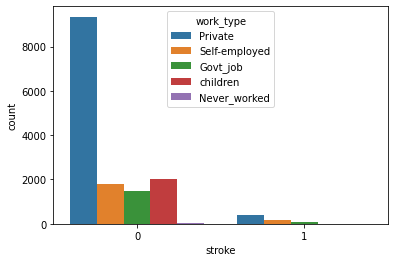

In [32]:
#people with private work type have suffered a stroke more followed by self_employed,govt_job and least in children
sns.countplot(data=train,x='stroke',hue='work_type')

In [33]:
stroke['smoking_status'].value_counts()

never smoked       257
formerly smoked    159
Unknown            108
smokes             108
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

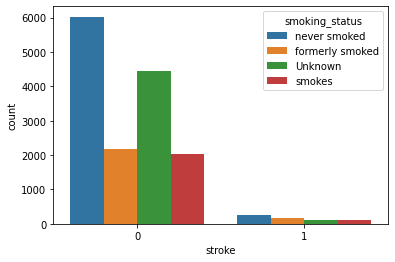

In [34]:
#checking the possible impact of smoking on stroke which seems negligible
sns.countplot(data=train,x='stroke',hue='smoking_status')

<AxesSubplot:xlabel='stroke', ylabel='count'>

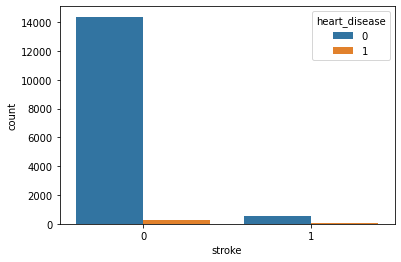

In [35]:
sns.countplot(data=train,x='stroke',hue='heart_disease')

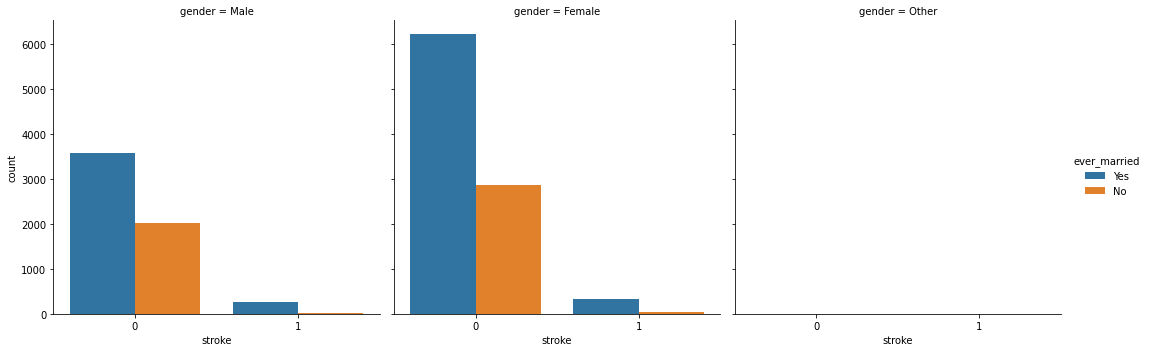

In [36]:
sns.catplot(data=train,x='stroke',hue='ever_married',col='gender',kind='count')

In [37]:
stroke['gender'].value_counts()

Female    368
Male      264
Name: gender, dtype: int64

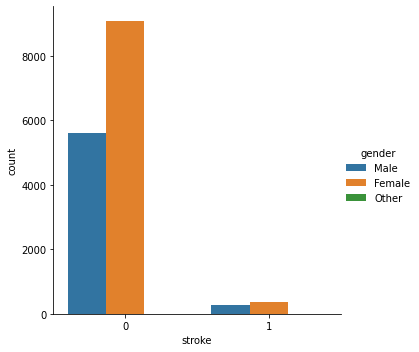

In [38]:
sns.catplot(data=train,x='stroke',hue='gender',kind='count')

In [39]:
X['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [40]:
#encoding categorical variables so that they can be used for training 
#looks like married people suffered from strokes more than unmarried i will encode married as 1 and unmarried as 0
X['ever_married'].replace({"Yes":1,"No":0},inplace=True)
X['Residence_type'].replace({"Urban":1,"Rural":0},inplace=True)
X['work_type'].replace({"Private":4,"Self-employed":3,"Govt_job":2,"children":1,"Never_worked":0},inplace=True)
X['gender'].replace({"Male":1,"Female":2,"Other":0},inplace=True)




In [41]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,1,28.0,0,0,1,4,1,79.53,31.1,never smoked
1,1,1,33.0,0,0,1,4,0,78.44,23.9,formerly smoked
2,2,2,42.0,0,0,1,4,0,103.00,40.3,Unknown
3,3,1,56.0,0,0,1,4,1,64.87,28.8,never smoked
4,4,2,24.0,0,0,0,4,0,73.36,28.8,never smoked


In [42]:
X=pd.get_dummies(X,columns=['smoking_status'])


In [43]:
X.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,1.617159,41.417708,0.049726,0.023327,0.678581,3.262480,0.499216,89.039853,28.112721,0.296850,0.152705,0.410416,0.140029
std,4418.028595,0.486230,21.444673,0.217384,0.150946,0.467037,1.107223,0.500016,25.476102,6.722315,0.456885,0.359715,0.491925,0.347028
min,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000,0.000000,0.000000
25%,3825.750000,1.000000,26.000000,0.000000,0.000000,0.000000,3.000000,0.000000,74.900000,23.500000,0.000000,0.000000,0.000000,0.000000
50%,7651.500000,2.000000,43.000000,0.000000,0.000000,1.000000,4.000000,0.000000,85.120000,27.600000,0.000000,0.000000,0.000000,0.000000
75%,11477.250000,2.000000,57.000000,0.000000,0.000000,1.000000,4.000000,1.000000,96.980000,32.000000,1.000000,0.000000,1.000000,0.000000
max,15303.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,267.600000,80.100000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)



In [49]:
y_train.value_counts()

0    11737
1      506
Name: stroke, dtype: int64

In [50]:
y_test.value_counts()

0    2935
1     126
Name: stroke, dtype: int64

In [51]:
X_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
rfc=RandomForestClassifier()
model3=rfc.fit(X_train,y_train)

In [55]:
y_pred3=model3.predict(X_test)

In [56]:
roc_auc_score(y_test,y_pred3)
#classification_report(y_test,y_pred3)

0.5189894810848814

In [57]:
confusion_matrix(y_test,y_pred3)

array([[2930,    5],
       [ 121,    5]])

In [67]:
from sklearn.tree import DecisionTreeClassifier
modeltree = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
modeltree.fit(X_train,y_train)
y_pred4=modeltree.predict(X_test)
roc_auc_score(y_test,y_pred4)

0.5797855655606934

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
LR=LogisticRegression(max_iter=10000)
model=LR.fit(X_train,y_train)


In [60]:
#using holdout validation
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
roc_auc_score(y_test,y_pred)

0.5312349584921987

In [70]:
#using k fold cross validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model,X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8615411116060441


In [61]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
model2=clf.fit(X_train,y_train)

In [62]:
y_pred1=model2.predict(X_test)

In [63]:
#SVM score using hold out validation
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
roc_auc_score(y_test,y_pred1)

0.5397325653714069

In [65]:
#SVM Model score using k fold cross validation
from sklearn.model_selection import KFold
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=7, random_state=40, shuffle=True)
scores = cross_val_score(model2,X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7686619908970422


In [72]:
#using k fold cross validation on decision tree model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=40, shuffle=True)
scores = cross_val_score(modeltree, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.5823924141793335
